# Fantasy baseball - data mining
The purpose of this database is to see what characteristics are associated with high fantasy ratings, by my hitters' metric that I did for Will.

# 1 Needed libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

# 2 Read in data

In [2]:
hitters = pd.read_csv("hitterdata2.csv")

In [3]:
hitters.head()

,birthYear,birthMonth,birthDay,nameFirst,nameLast,weight,height,bats,throws,debut,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1954,9,8,Don,Aase,190,75,R,R,1977-07-26,...,0,0,0,0,0,0,0,0,0,0
1,1962,7,4,Johnny,Abrego,185,72,R,R,1985-09-04,...,0,0,0,0,0,0,0,0,0,0
2,1958,9,24,Jim,Acker,210,74,R,R,1983-04-07,...,0,0,0,0,0,0,0,0,0,0
3,1959,1,21,Ricky,Adams,180,74,R,R,1982-09-15,...,5,17,25,0,0,0,0,0,5,8
4,1958,2,23,Juan,Agosto,190,74,L,L,1981-09-07,...,0,0,0,0,0,0,0,0,0,0


In [4]:
hitters.columns

Index(['birthYear', 'birthMonth', 'birthDay', 'nameFirst', 'nameLast',
       'weight', 'height', 'bats', 'throws', 'debut', 'playerID', 'yearID',
       'teamID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS',
       'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'G_all', 'GS',
       'G_batting', 'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr'],
      dtype='object')

In [5]:
hitters.describe()

,birthYear,birthMonth,birthDay,weight,height,yearID,G,AB,R,H,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
count,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,...,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000,37402.000000
mean,1972.796615,6.674536,15.904417,199.627854,73.510106,2001.466793,55.228036,134.240923,17.916983,35.102107,...,4.480776,4.533046,4.405727,4.898615,4.490295,4.681969,13.614566,2.234025,4.699401,0.794423
std,9.972674,3.441114,8.733498,22.437980,2.281520,9.107584,47.459304,189.118473,28.186831,52.908314,...,20.267500,20.233400,21.052047,18.656955,20.265939,19.481784,34.917222,11.122938,9.831368,2.386474
min,1939.000000,1.000000,1.000000,140.000000,66.000000,1985.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1965.000000,4.000000,8.000000,185.000000,72.000000,1994.000000,16.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,7.000000,16.000000,200.000000,74.000000,2002.000000,37.000000,26.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1981.000000,10.000000,23.000000,215.000000,75.000000,2009.000000,85.000000,224.000000,27.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
max,1996.000000,12.000000,31.000000,320.000000,83.000000,2016.000000,163.000000,716.000000,152.000000,262.000000,...,162.000000,162.000000,163.000000,162.000000,162.000000,162.000000,162.000000,153.000000,95.000000,44.000000


In [6]:
hitters.dtypes

birthYear      int64
birthMonth     int64
birthDay       int64
nameFirst     object
nameLast      object
weight         int64
height         int64
bats          object
throws        object
debut         object
playerID      object
yearID         int64
teamID        object
G              int64
AB             int64
R              int64
H              int64
2B             int64
3B             int64
HR             int64
RBI            int64
SB             int64
CS             int64
BB             int64
SO             int64
IBB            int64
HBP            int64
SH             int64
SF             int64
GIDP           int64
G_all          int64
GS             int64
G_batting      int64
G_defense      int64
G_p            int64
G_c            int64
G_1b           int64
G_2b           int64
G_3b           int64
G_ss           int64
G_lf           int64
G_cf           int64
G_rf           int64
G_of           int64
G_dh           int64
G_ph           int64
G_pr           int64
dtype: object

The key on this dataset is the player ID and year.

# 3 Cleanup

The following tasks need doing:

* Dump anyone with zero at bats
* Figure out the primary positions of each player, and exclude those who are primarily pitchers
* Replace the three birth date columns with a single date
* Change the debut column into a date
* Add a column representing the season start date (assumed to be April 10)

In [7]:
hitters = hitters[hitters['AB'] != 0]

In [8]:
# Get primary position
gamescols = ['G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh']
prim_pos_index = np.argmax(hitters[gamescols].as_matrix(), axis=1)
prim_pos = []
for i in range(len(hitters)):
    prim_pos.append(gamescols[prim_pos_index[i]][2:])
hitters['prim_pos'] = prim_pos

In [9]:
# Replace three birth date columns with a single date
hitters['birthDate'] = hitters[['birthYear','birthMonth','birthDay']].apply(lambda s: datetime(*s),axis=1)

In [10]:
hitters = hitters.drop(labels=['birthYear','birthMonth','birthDay'], axis=1)

In [11]:
def makeSeasonDate(x):
    s = '{0}-{1}-{2}'.format(x, 4, 10)
    dt = datetime.strptime(s, '%Y-%m-%d')
    return dt

In [12]:
hitters['seasonDate'] = hitters['yearID'].apply(makeSeasonDate)

In [13]:
hitters['debut'] = hitters['debut'].apply(lambda x: datetime.strptime(x, '%Y-%M-%d'))

In [14]:
hitters.head()

,nameFirst,nameLast,weight,height,bats,throws,debut,playerID,yearID,teamID,...,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,prim_pos,birthDate,seasonDate
1,Johnny,Abrego,185,72,R,R,1985-01-04 00:09:00,abregjo01,1985,CHN,...,0,0,0,0,0,0,0,p,1962-07-04,1985-04-10
3,Ricky,Adams,180,74,R,R,1982-01-15 00:09:00,adamsri02,1985,SFN,...,0,0,0,0,0,5,8,ss,1959-01-21,1985-04-10
5,Luis,Aguayo,173,69,R,R,1980-01-19 00:04:00,aguaylu01,1985,PHI,...,0,0,0,0,0,11,9,ss,1959-03-13,1985-04-10
6,Rick,Aguilera,195,76,R,R,1985-01-12 00:06:00,aguilri01,1985,NYN,...,0,0,0,0,0,0,1,p,1961-12-31,1985-04-10
7,Willie,Aikens,220,75,L,R,1977-01-17 00:05:00,aikenwi01,1985,TOR,...,0,0,0,0,11,6,0,dh,1954-10-14,1985-04-10


# 4 Feature engineering

The following tasks need doing:

* Calculate player age
* Calculate years in the league as (April 10 of season year - debut date). Not quite right but should be close enough.
* Calculate number of singles
* Calculate batting average
* Calculate on-base percentage
* Calculate slugging percentage
* Calculate OPS
* Calculate scaled statistics - BA, R, HR, RBI, SB 
* Calculate JDFS Rating

The scaling I did was wrong before. This time I am getting a Z-score for each column separately, applying the normal cumulative distribution, and generating the associated percentile rank. I will add these together and then multiply by the penalty for low at bats.

In [15]:
# Player age
hitters['Age'] = np.floor((hitters['seasonDate'] - hitters['birthDate']) / np.timedelta64(1,'Y'))

In [16]:
# Years of service
hitters['YrsServ'] = np.floor((hitters['seasonDate'] - hitters['debut']) / np.timedelta64(1,'Y'))

In [17]:
# Number of singles
hitters['1B'] = hitters['H'] - hitters['2B'] - hitters['3B'] - hitters['HR']

In [18]:
# Batting average
hitters['BA'] = hitters['H'] / hitters['AB']
hitters['BA'] = hitters['BA'].fillna(0)

In [19]:
# On base percentage
hitters['OBP'] = (hitters['H']+hitters['BB']+hitters['HBP']) / (hitters['AB']+hitters['BB']+hitters['HBP']+hitters['SF'])
hitters['OBP'] = hitters['OBP'].fillna(0)

In [20]:
# Slugging percentage
hitters['SLG'] = (hitters['1B'] + 2 * hitters['2B'] + 3 * hitters['3B'] + 4*hitters['HR']) / hitters['AB']

In [21]:
# On base plus slugging
hitters['OPS'] = hitters['OBP'] + hitters['SLG']

In [22]:
# Scaled statistics
hitters['BA_Scaled'] = hitters.groupby("yearID")['BA'].apply(lambda x: (x-np.mean(x))/(np.std(x)))
hitters['HR_Scaled'] = hitters.groupby("yearID")['HR'].apply(lambda x: (x-np.mean(x))/(np.std(x)))
hitters['R_Scaled'] = hitters.groupby("yearID")['R'].apply(lambda x: (x-np.mean(x))/(np.std(x)))
hitters['RBI_Scaled'] = hitters.groupby("yearID")['RBI'].apply(lambda x: (x-np.mean(x))/(np.std(x)))
hitters['SB_Scaled'] = hitters.groupby("yearID")['SB'].apply(lambda x: (x-np.mean(x))/(np.std(x)))

In [23]:
# JDFS rating
def applyPenalty(x):
    if (x < 50):
        return 0.1
    elif (x >= 300):
        return 1
    else:
        return (0.1 + 1.08* ((x-50)/300))

In [24]:
# Penalty for people who don't have enough atbats
hitters['Penalty'] = hitters['AB'].apply(applyPenalty)

In [25]:
# Adjusted star rating
hitters['AdjStars'] = hitters['Penalty']*(norm.cdf(hitters['BA_Scaled']) + norm.cdf(hitters['HR_Scaled']) + norm.cdf(hitters['R_Scaled']) + norm.cdf(hitters['RBI_Scaled']) + norm.cdf(hitters['SB_Scaled']))

# 5 Exploratory data analysis


# 5.1 Distribution of stars by year
I would like to see a distribution of stars by year, to make sure there isn't any trend in the star rating.

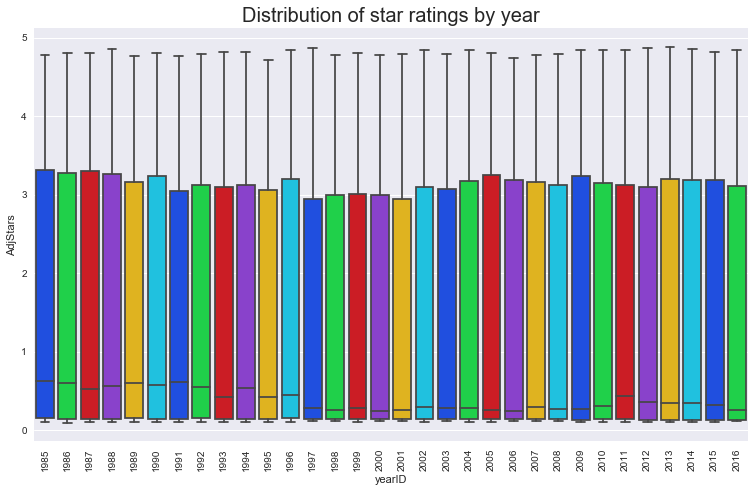

In [26]:
%matplotlib inline
sns.set(style='darkgrid')
fig, ax=pyplot.subplots(figsize=(12.8,7.6))
ax.set_title('Distribution of star ratings by year', fontsize=20)
ax.set_ylabel('Adjusted star rating')
ax.set_xlabel('Year')
g = sns.boxplot(x='yearID',y='AdjStars', data=hitters, palette='bright')
pyplot.setp(g.get_xticklabels(), rotation=90)
pyplot.show(g)

In [27]:
df = hitters.groupby('yearID')['AdjStars'].mean()

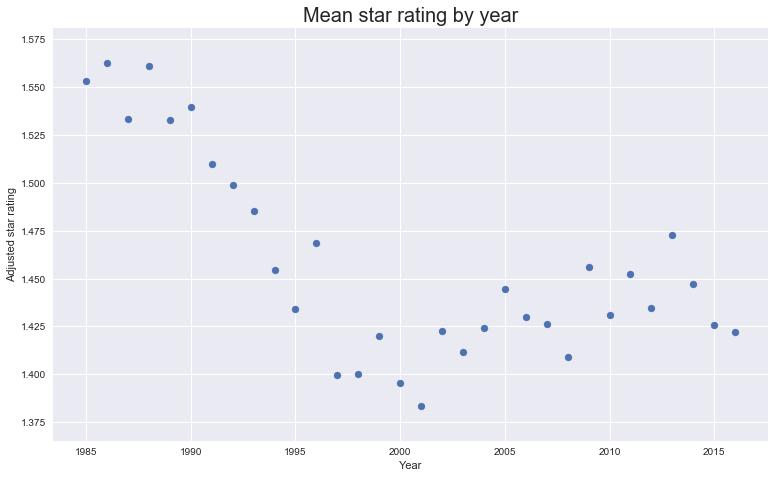

In [28]:
fig = pyplot.figure(figsize=(12.8,7.6))
ax = fig.add_subplot(111)
ax.set_title('Mean star rating by year', fontsize=20)
ax.set_ylabel('Adjusted star rating')
ax.set_xlabel('Year')
ax.scatter(x=np.arange(1985,2017,1),y=df)
pyplot.show()

## 5.2 Correlation
Let's examine the correlations between certain statistics.

In [29]:
hitters.columns

Index(['nameFirst', 'nameLast', 'weight', 'height', 'bats', 'throws', 'debut',
       'playerID', 'yearID', 'teamID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'G_all', 'GS', 'G_batting', 'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b',
       'G_3b', 'G_ss', 'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr',
       'prim_pos', 'birthDate', 'seasonDate', 'Age', 'YrsServ', '1B', 'BA',
       'OBP', 'SLG', 'OPS', 'BA_Scaled', 'HR_Scaled', 'R_Scaled', 'RBI_Scaled',
       'SB_Scaled', 'Penalty', 'AdjStars'],
      dtype='object')

In [30]:
useCols = ['weight','height','R','H','1B','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','SH','SF','GIDP','Age','YrsServ','OBP','SLG','OPS','AdjStars']

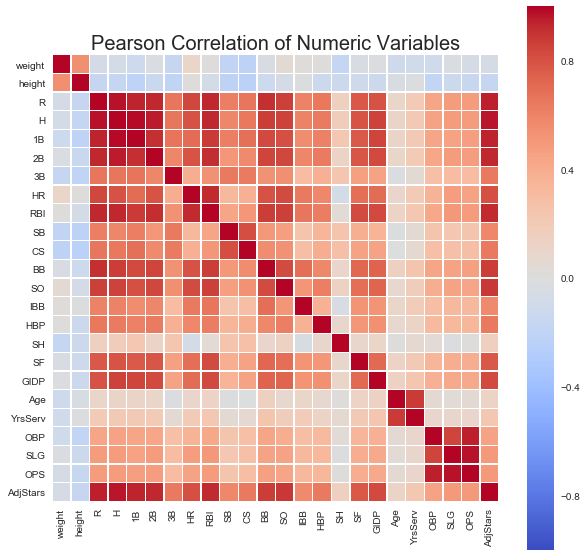

In [31]:
#mask = (hitters[useCols].corr() < 0.3) & (hitters[useCols].corr() > -0.3)
fig, ax = pyplot.subplots(figsize=(10, 10))
pyplot.title('Pearson Correlation of Numeric Variables', fontsize=20)
sns.heatmap(hitters[useCols].corr(),linewidths=0.35,vmax=1.0, square=True, cmap="coolwarm")
pyplot.show()

This appears to show that age and years of service are not really correlated with star rating. Player size is weakly negatively correlated with my star rating. It makes sense that the statistics directly relevant to the star rating are strongly positively correlated, but triples are less so. Strangely, stolen bases are directly relevant, but correlation is weaker. Even more strangely, the sabermetrician's favorite stats - OBP, SLG, OPS - are weaker (but still positive) correlations.

The strongest correlations that aren't one of the five scoring criteria directly are singles, doubles, and walks. Sac flies and grounding into double plays(!) are strong. Being hit by pitches appears to be stronger than stolen bases, which is one of the scoring categories!

## 5.3 Highest rated player by year
Let's find the highest rated player by year. The ultimate result is a list of names I would expect to see. However, Miguel Cabrera won the Triple Crown in 2012. This shows that Mike Trout led the league in star rating during that year. Since the Triple Crown is three of the five scoring categories, this should be investigated further.

In [32]:
highest = hitters.groupby(['yearID'])['AdjStars'].max()

In [33]:
highestidx = hitters.groupby('yearID')['AdjStars'].idxmax()

In [34]:
best = hitters.loc[highestidx][['yearID','nameFirst','nameLast','Age','YrsServ','AdjStars','BA_Scaled','HR_Scaled','R_Scaled','SB_Scaled','RBI_Scaled']]

In [35]:
best

,yearID,nameFirst,nameLast,Age,YrsServ,AdjStars,BA_Scaled,HR_Scaled,R_Scaled,SB_Scaled,RBI_Scaled
29623,1985,Ryne,Sandberg,25.0,4.0,4.778404,0.869488,2.633075,2.915194,4.884599,1.989969
27097,1986,Kirby,Puckett,26.0,2.0,4.800822,1.132331,3.281865,3.179827,1.527224,2.522555
33868,1987,Alan,Trammell,29.0,10.0,4.806028,1.180060,2.372878,2.589053,1.588563,2.557749
5139,1988,Jose,Canseco,23.0,3.0,4.849202,1.035985,5.269839,3.348979,3.582750,3.677136
31404,1989,Lonnie,Smith,33.0,11.0,4.770723,0.886820,2.456438,2.358317,2.399630,2.113282
2696,1990,Barry,Bonds,25.0,4.0,4.809491,0.886774,3.878489,2.824380,5.138209,3.297953
10319,1991,Julio,Franco,32.0,9.0,4.769327,1.185225,1.378829,2.876343,3.584914,1.934036
2748,1992,Barry,Bonds,27.0,6.0,4.785979,0.801091,4.386162,3.094357,3.739266,2.989419
2775,1993,Barry,Bonds,28.0,7.0,4.817648,0.917662,5.077320,3.325194,2.881257,3.273438
1071,1994,Jeff,Bagwell,25.0,3.0,4.821183,1.089796,4.882594,3.309424,1.746093,3.888536


### 5.3.1 Testing
We need to examine this closer. Look particularly at 2012 - Ryan Braun was the league leader in adjusted star rating. This was the same year Miguel Cabrera won the Triple Crown, and also the same year Mike Trout came into the league, with memorable effect. These extracts show that that the scaling worked: Cabrera still leads the league in the 3 scaled statistics corresponding to the Triple Crown. However, Trout scored more runs than Cabrera, 

In [36]:
miggy = hitters[(hitters['yearID']==2012) & (hitters['nameFirst']=='Miguel') & (hitters['nameLast']=='Cabrera')][['BA_Scaled','HR_Scaled','R_Scaled','SB_Scaled','RBI_Scaled','AdjStars']]

In [37]:
miggy

,BA_Scaled,HR_Scaled,R_Scaled,SB_Scaled,RBI_Scaled,AdjStars
4946,1.178966,4.674083,3.07805,0.087134,4.206869,4.414455


In [38]:
trout = hitters[(hitters['yearID']==2012) & (hitters['nameFirst']=='Mike') & (hitters['nameLast']=='Trout')][['BA_Scaled','HR_Scaled','R_Scaled','SB_Scaled','RBI_Scaled','AdjStars']]

In [39]:
trout

,BA_Scaled,HR_Scaled,R_Scaled,SB_Scaled,RBI_Scaled,AdjStars
34529,1.145535,2.989482,3.785334,6.351596,2.212137,4.859054


In [40]:
braun = hitters[(hitters['yearID']==2012) & (hitters['nameFirst']=='Ryan') & (hitters['nameLast']=='Braun')][['BA_Scaled','HR_Scaled','R_Scaled','SB_Scaled','RBI_Scaled','AdjStars']]
braun

,BA_Scaled,HR_Scaled,R_Scaled,SB_Scaled,RBI_Scaled,AdjStars
4109,1.093864,4.313097,3.042686,3.706601,3.245123,4.86112


In [41]:
miggyprob = norm.cdf(miggy)
troutprob = norm.cdf(trout)
braunprob = norm.cdf(braun)

In [42]:
print(miggyprob)
print(troutprob)
print(braunprob)

[[ 0.88079416  0.99999852  0.9989582   0.53471738  0.99998705  0.99999494]]
[[ 0.87400628  0.99860274  0.99992325  1.          0.98652141  0.99999941]]
[[ 0.86299275  0.99999195  0.99882762  0.99989497  0.999413    0.99999942]]


In [43]:
print('Cabrera: ',np.sum(miggyprob[:,0:5], axis=1))
print('Trout: ',np.sum(troutprob[:,0:5], axis=1))
print('Braun: ',np.sum(braunprob[:,0:5], axis=1))

Cabrera:  [ 4.41445532]
Trout:  [ 4.85905368]
Braun:  [ 4.86112028]


## 5.4 Height and weight
Let's look at scatter plots of star ratings versus height and weight.

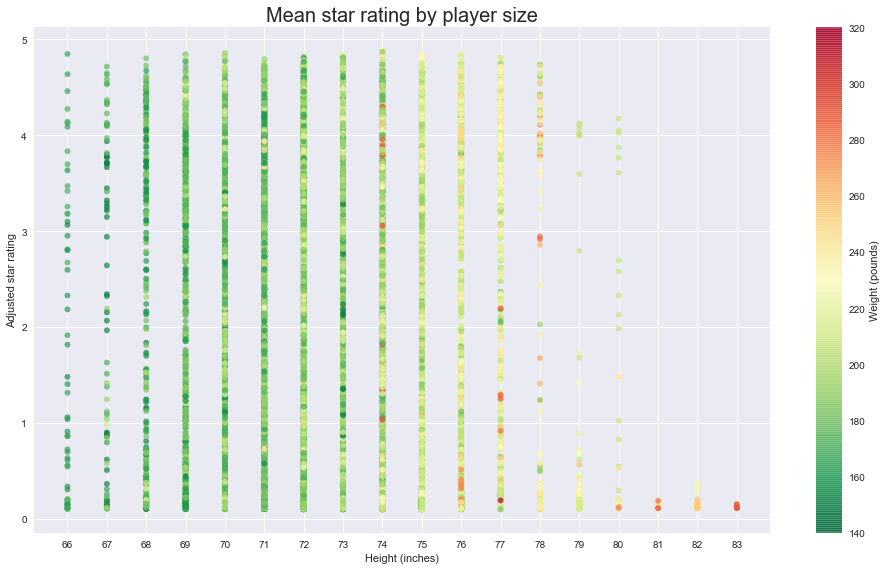

In [44]:
from matplotlib import colorbar
fig = pyplot.figure(figsize=(16.5,9.3))
ax = fig.add_subplot(111)
ax.set_title('Mean star rating by player size', fontsize=20)
ax.set_ylabel('Adjusted star rating')
ax.set_xlabel('Height (inches)')
blah = ax.scatter(x=hitters['height'],y=hitters['AdjStars'], c=hitters['weight'],s=30, alpha=0.7, cmap=pyplot.get_cmap('RdYlGn_r'))
b = pyplot.colorbar(blah, orientation='vertical')
b.set_label('Weight (pounds)')
pyplot.xticks(np.arange(66,84,1))
pyplot.show()

### 5.4.1 Distribution of heights, weights, ages, and years of service of top players (4 or more stars)
Doesn't explain a guy like Jose Altuve, for instance.

In [45]:
hitters_top = hitters[hitters['AdjStars']>=4]

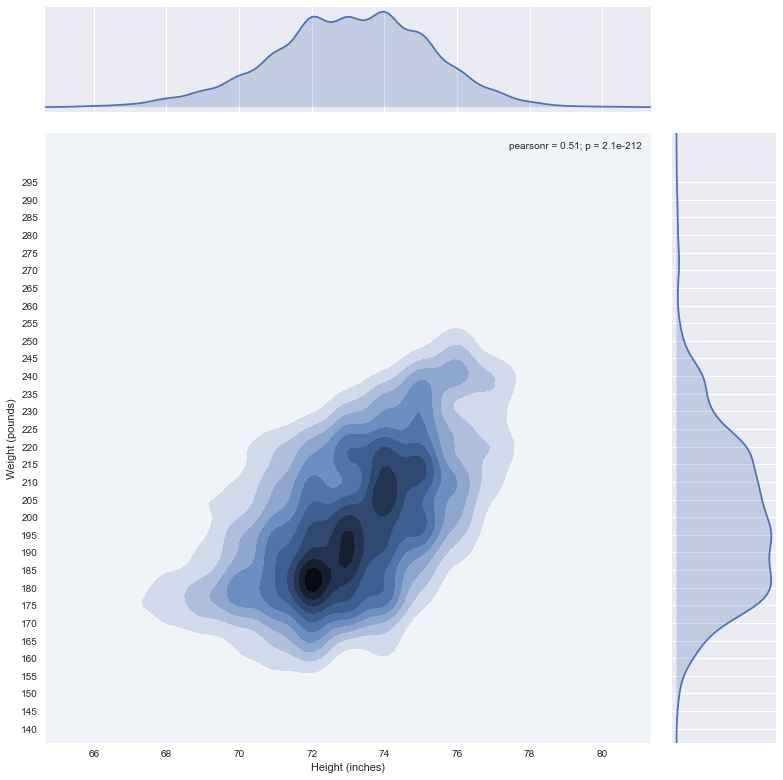

In [46]:
# Heights and weights
blah2 = sns.jointplot(x='height',y='weight', data=hitters_top, kind='kde',size=11, fontsize=12)
blah2.set_axis_labels('Height (inches)', 'Weight (pounds)')
pyplot.yticks(np.arange(140,300,5))
pyplot.show(blah2)

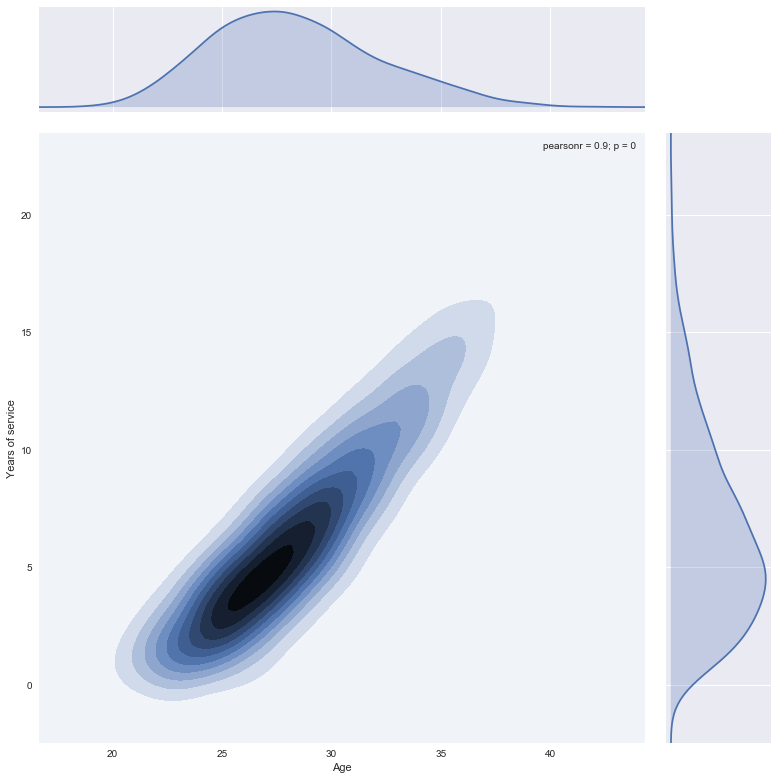

In [47]:
# Ages and years of service
blah3 = sns.jointplot(x='Age',y='YrsServ', data=hitters_top, kind='kde',size=11, fontsize=12)
blah3.set_axis_labels('Age', 'Years of service')
pyplot.show(blah3)

This graph really agrees with my correllogram, in that age and years of service matter in the way you expect it to. It looks like the top performers are concentrated in their mid-to-late 20s and  3-8 years in the big leagues, but I doubt that really helps anyone make decisions.

## 5.5 Assumption check
We should check the distributions of the five scoring criteria before we go any further. The following set of graphs is going to show that the assumption of normal distributions for the five scaled statistics was a bunch of crap. Poisson might be a better fit for these.

In [84]:
cmap=pyplot.get_cmap('Vega10')
#hitters2016 = hitters[hitters['yearID']==2016]

In [154]:
hitters[['BA','HR','R','SB','RBI']].describe()

,BA,HR,R,SB,RBI
count,27953.000000,27953.000000,27953.000000,27953.00000,27953.000000
mean,0.203414,5.190785,23.971059,3.42389,22.715737
std,0.130216,8.518032,30.298274,7.75834,29.920854
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.133333,0.000000,1.000000,0.00000,0.000000
50%,0.232558,1.000000,8.000000,0.00000,7.000000
75%,0.272727,7.000000,41.000000,3.00000,37.000000
max,1.000000,73.000000,152.000000,110.00000,165.000000


This that 75% of major league players, during any season between 1985 and 2016, did the following:

* Hit less than .273,
* Hit 7 home runs or fewer,
* Scored 41 runs or less,
* Stole at most 3 bases, or
* Hit 37 or fewer RBI.

That's quite astonishing, and puts the lie to the assumption of normality. So I browsed the distribution fitting methods available in scipy and played with them until I found one I liked. First, a graphical representation of the above:

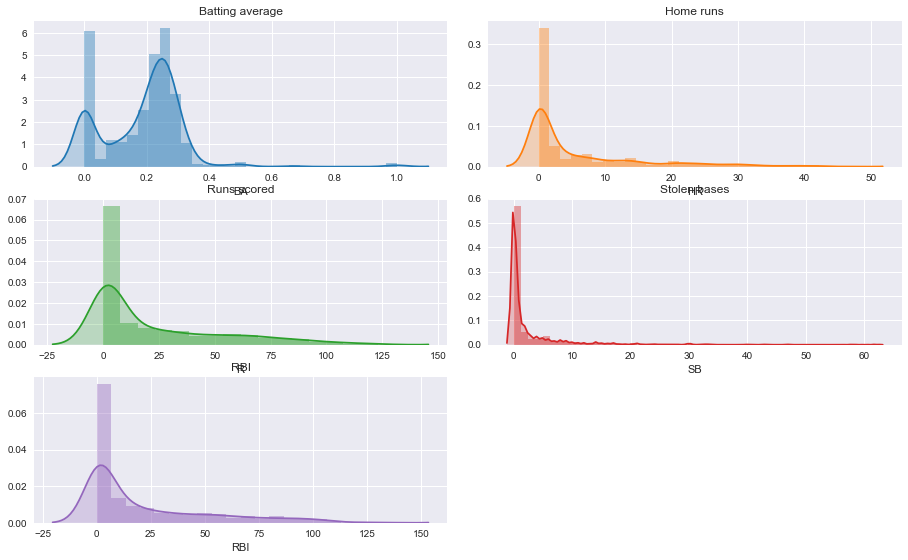

In [86]:
keyCols = ['Batting average','Home runs','Runs scored','Stolen bases','RBI']
fig, axes = pyplot.subplots(nrows=3, ncols=2)
fig.set_size_inches(12.8,7.6)
pyplot.tight_layout()
axes[0,0].set_title('Batting average')
sns.distplot(hitters2016['BA'], color=cmap.colors[0], ax=axes[0,0], kde_kws={'shade':True})
axes[0,1].set_title('Home runs')
sns.distplot(hitters2016['HR'], color=cmap.colors[1], ax=axes[0,1], kde_kws={'shade':True})
axes[1,0].set_title('Runs scored')
sns.distplot(hitters2016['R'], color=cmap.colors[2], ax=axes[1,0], kde_kws={'shade':True})
axes[1,1].set_title('Stolen bases')
sns.distplot(hitters2016['SB'], color=cmap.colors[3], ax=axes[1,1], kde_kws={'shade':True})
axes[2,0].set_title('RBI')
sns.distplot(hitters2016['RBI'], color=cmap.colors[4], ax=axes[2,0], kde_kws={'shade':True})
fig.delaxes(axes[2,1])
pyplot.show()

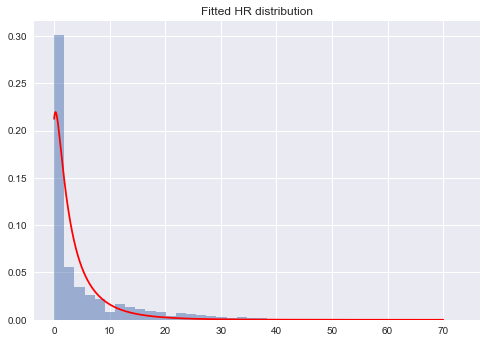

In [164]:
# Fit to homeruns, runs scored, stolen bases, and RBI
from scipy.stats import wald
HR_params = wald.fit(hitters['HR'])
x = np.linspace(0,70,1000)
pyplot.title("Fitted HR distribution")
pyplot.plot(x, wald.pdf(x, loc=HR_params[0], scale=HR_params[1]),'r-')
pyplot.hist(hitters['HR'], normed=1, alpha=0.5, bins=40)
pyplot.show()

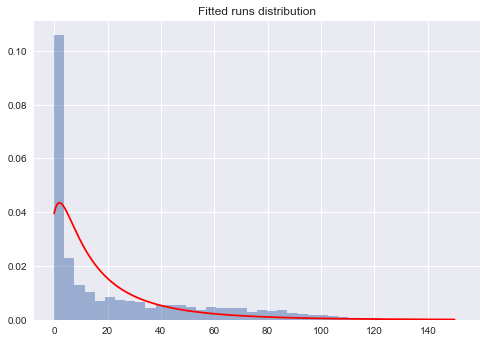

In [165]:
R_params = wald.fit(hitters['R'])
x = np.linspace(0,150,1000)
pyplot.title("Fitted runs distribution")
pyplot.plot(x, wald.pdf(x, loc=R_params[0], scale=R_params[1]),'r-')
pyplot.hist(hitters['R'], normed=1, alpha=0.5, bins=40)
pyplot.show()

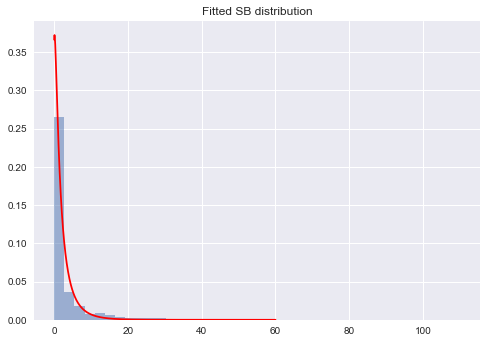

In [167]:
SB_params = wald.fit(hitters['SB'])
x = np.linspace(0,60,1000)
pyplot.title("Fitted SB distribution")
pyplot.plot(x, wald.pdf(x, loc=SB_params[0], scale=SB_params[1]),'r-')
pyplot.hist(hitters['SB'], normed=1, alpha=0.5, bins=40)
pyplot.show()

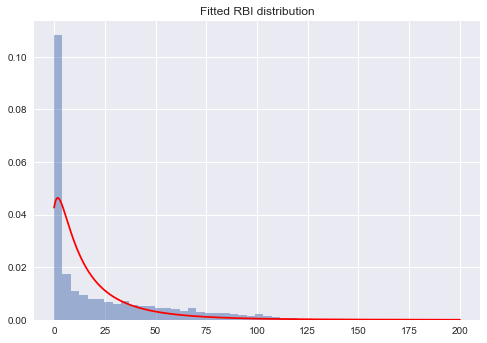

In [169]:
RBI_params = wald.fit(hitters['RBI'])
x = np.linspace(0,200,1000)
pyplot.title("Fitted RBI distribution")
pyplot.plot(x, wald.pdf(x, loc=RBI_params[0], scale=RBI_params[1]),'r-')
pyplot.hist(hitters['RBI'], normed=1, alpha=0.5, bins=40)
pyplot.show()

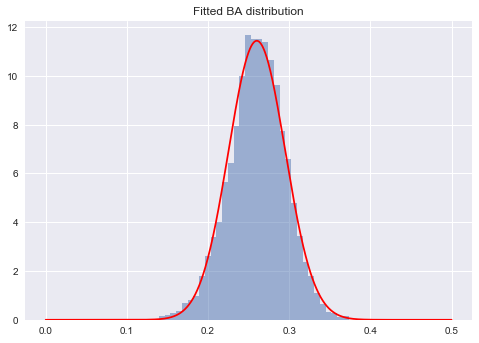

In [178]:
# Batting average is different
# Here I only consider players with at least 100 at bats
from scipy.stats import lognorm
BA_params = lognorm.fit(hitters[hitters['AB']>=100]['BA'])
x = np.linspace(0,0.5,1000)
pyplot.title("Fitted BA distribution")
pyplot.plot(x, lognorm.pdf(x, s=BA_params[0], loc=BA_params[1], scale=BA_params[2]),'r-')
pyplot.hist(hitters[hitters['AB']>=100]['BA'], normed=1, alpha=0.5, bins=40)
pyplot.show()

# 6 Comparing players
This is a helper function that returns the star rating for a given player (by name) for all the years they are present in the data.

In [64]:
def getStars(first, last, hitters):
    player = hitters[(hitters['nameFirst']==first) & (hitters['nameLast']==last)][['BA_Scaled','HR_Scaled','R_Scaled','SB_Scaled','RBI_Scaled']]
    player_prob = np.sum(norm.cdf(player),axis=1)
    return player_prob